# Principal Component Analysis with Cancer Data

In [28]:
#Import all the necessary modules
#Import all the necessary modules
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [29]:
dataset = pd.read_csv("breast-cancer-wisconsin-data.csv")
dataset.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [30]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
dataframe = dataset.drop(labels= ["ID","Class"] , axis = 1)
dataframe.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [31]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(8), object(1)
memory usage: 49.2+ KB


In [32]:
dataframe.shape

(699, 9)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [33]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

#looking at the above data information, it can be observed that Bare Nuclei attribute in the data frame has '?' in it.
#Hence replacing the question mark with the mean of the column.

In [34]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

valCount = dataframe["Bare Nuclei"].value_counts()
print("The count of rows having ? is {}".format(valCount["?"]))

# Replacing '?' with the mean for Bare Nuclei column 
dataframe["Bare Nuclei"] = dataframe["Bare Nuclei"].replace('?',0).astype('int64')
dataframe["Bare Nuclei"] = dataframe["Bare Nuclei"].replace(0,round(dataframe["Bare Nuclei"].mean())).astype('int64')
print(dataframe.info())

The count of rows having ? is 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(9)
memory usage: 49.2 KB
None


In [35]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation & pairplots. 


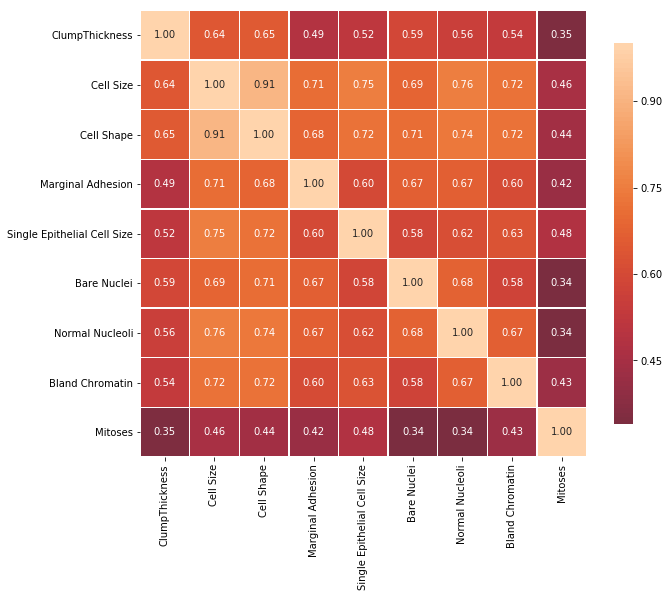

In [36]:
# Check for correlation of variable
plt.figure(figsize=(10,10))
sns.heatmap(dataframe.corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [37]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

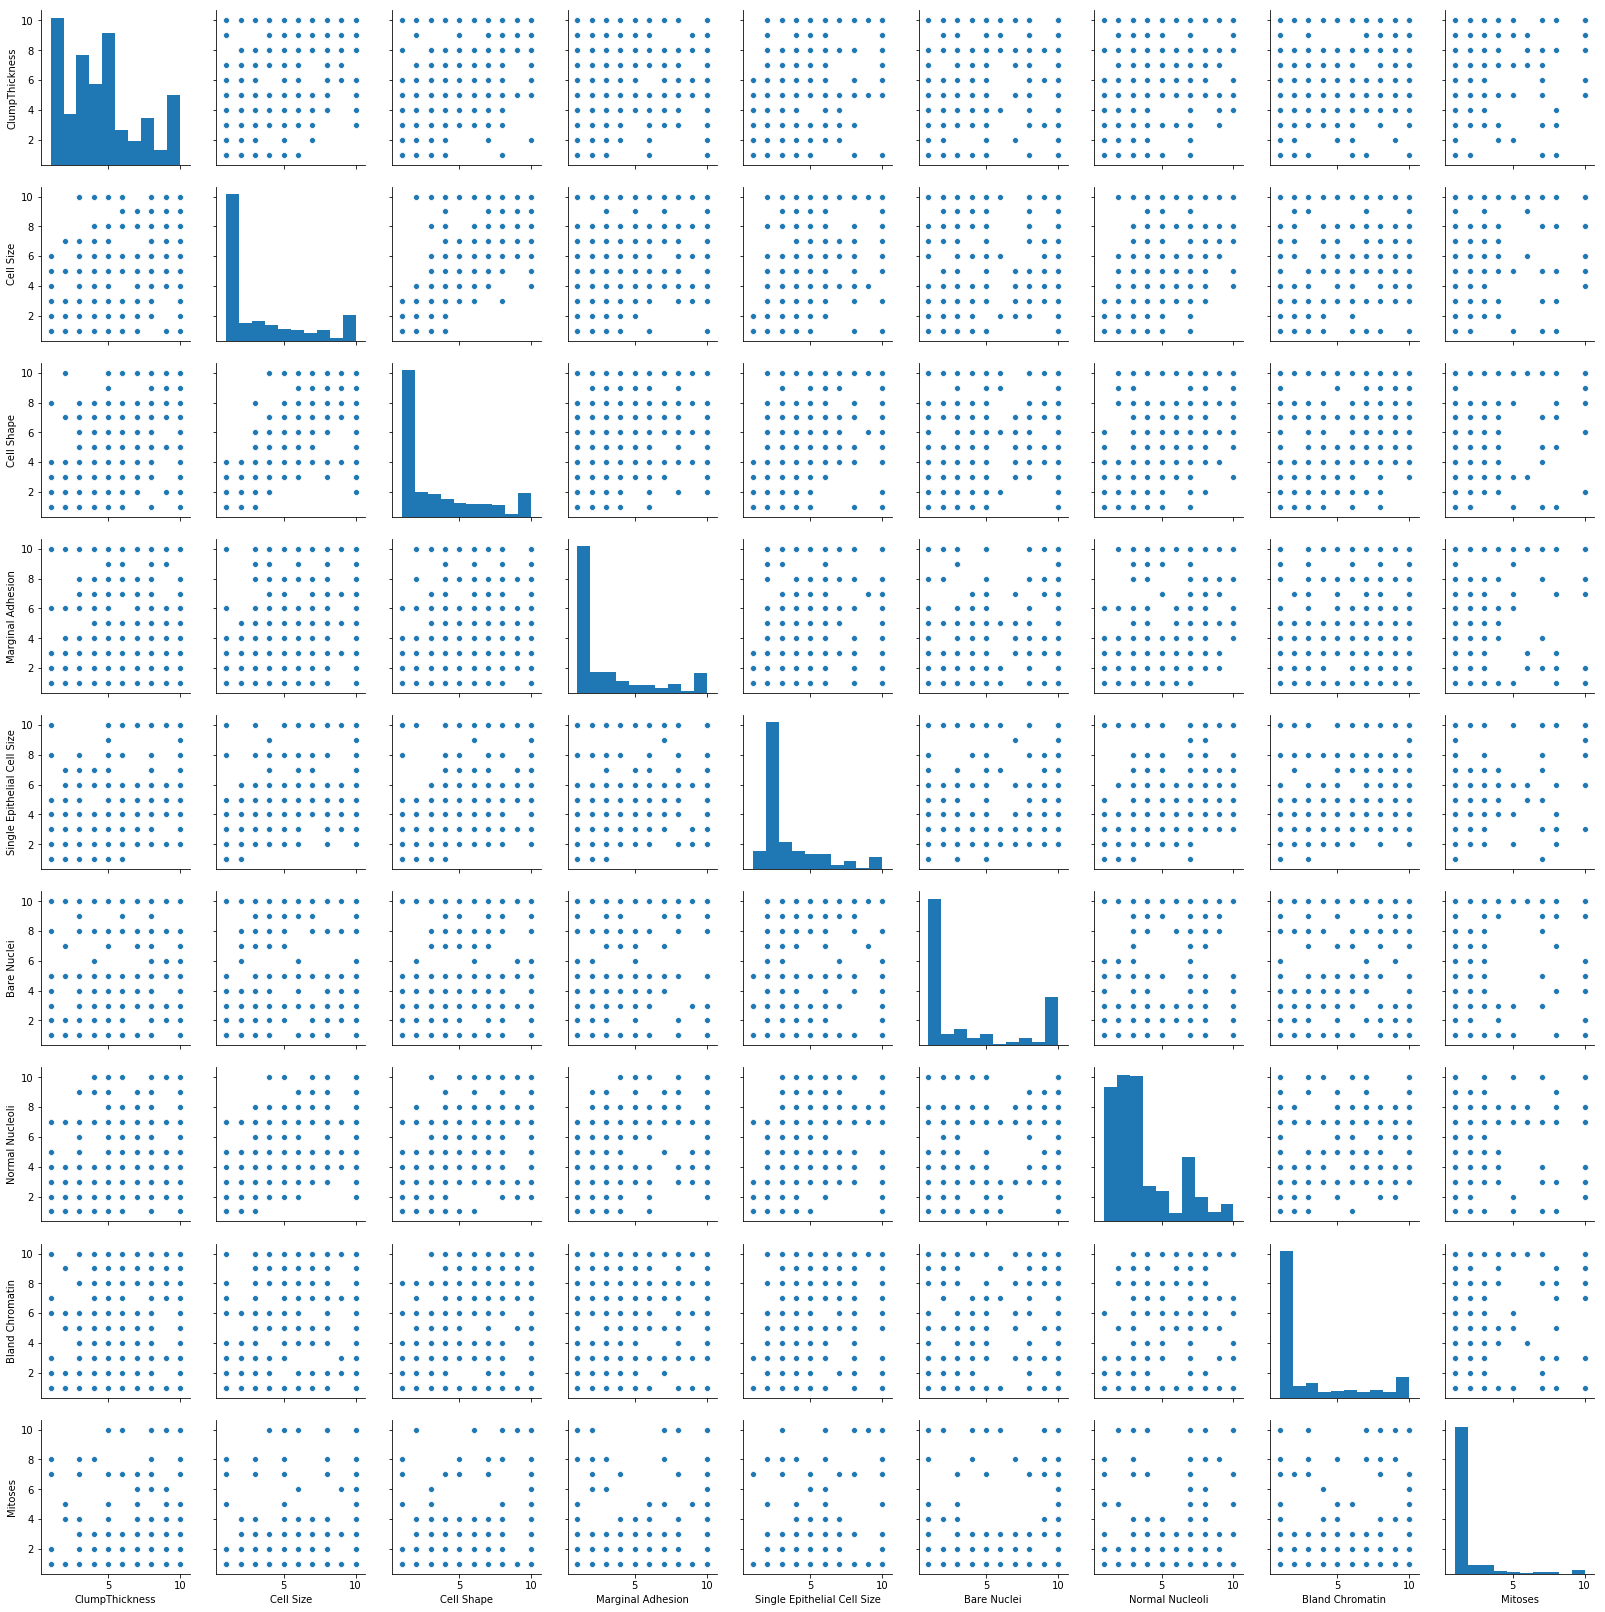

In [38]:
#Let us check for pair plots
sns.pairplot(dataframe)

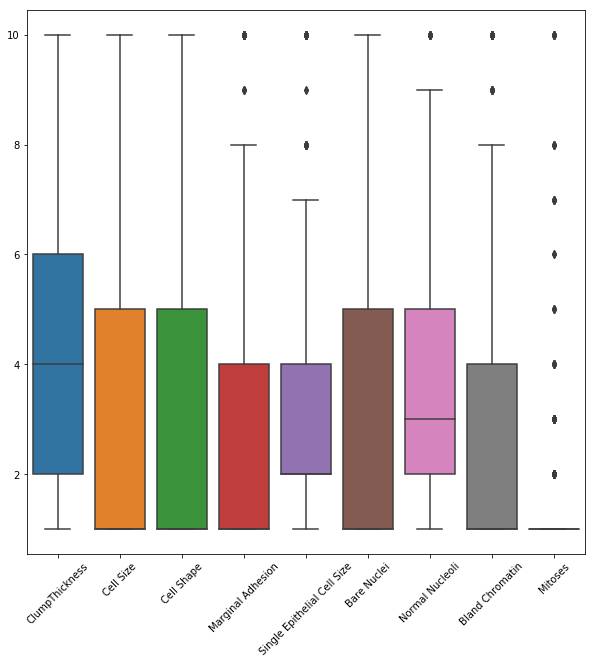

In [39]:
#Analysing the outliers from the box plot
plt.figure(figsize=(10,10))
ax = sns.boxplot( data=dataframe)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

# Q5 Remove any unwanted columns or outliers, standardize variables in this pre-processing step

In [40]:
# We could see most of the outliers are now removed.

In [41]:
# Create correlation matrix
#From the below 
corr_matrix = dataframe.corr().abs()
print(corr_matrix)

                             ClumpThickness  Cell Size  Cell Shape  \
ClumpThickness                     1.000000   0.644913    0.654589   
Cell Size                          0.644913   1.000000    0.906882   
Cell Shape                         0.654589   0.906882    1.000000   
Marginal Adhesion                  0.486356   0.705582    0.683079   
Single Epithelial Cell Size        0.521816   0.751799    0.719668   
Bare Nuclei                        0.588433   0.687417    0.709812   
Normal Nucleoli                    0.558428   0.755721    0.735948   
Bland Chromatin                    0.535835   0.722865    0.719446   
Mitoses                            0.350034   0.458693    0.438911   

                             Marginal Adhesion  Single Epithelial Cell Size  \
ClumpThickness                        0.486356                     0.521816   
Cell Size                             0.705582                     0.751799   
Cell Shape                            0.683079                

In [42]:
dataset.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


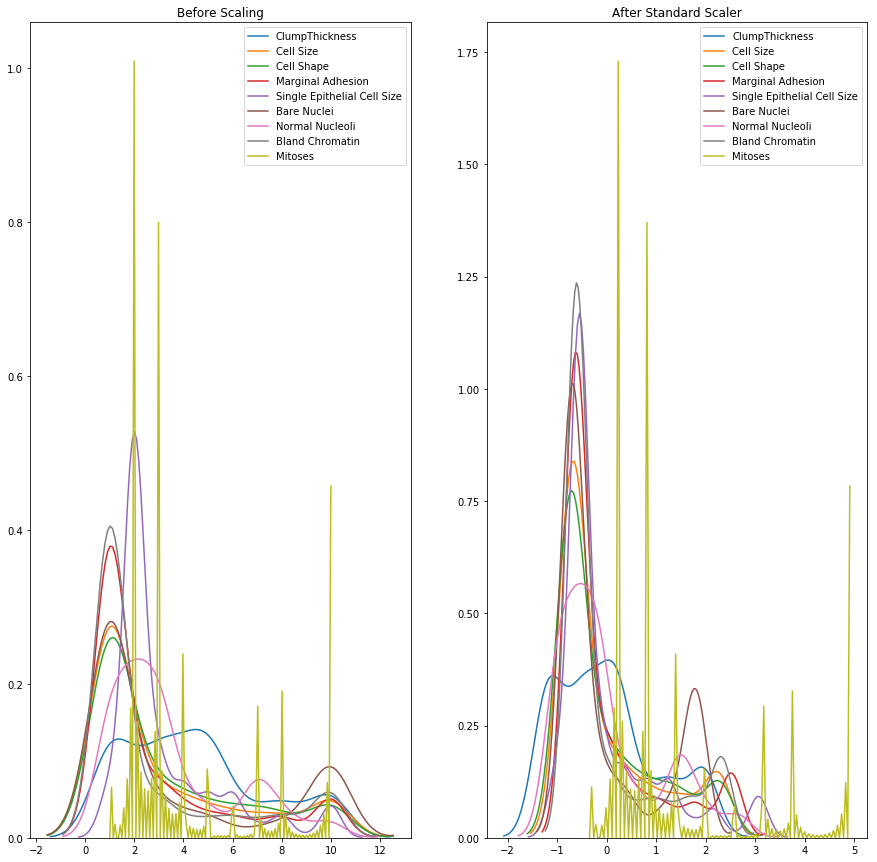

In [43]:
# We could see most of the outliers are now removed.
from sklearn import preprocessing
descr_trans_df = dataframe.describe()
scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(dataframe[list(descr_trans_df.T.index)])
scaled_X = pd.DataFrame(scaled_X, columns=list(descr_trans_df.T.index))
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 15))
ax1.set_title('Before Scaling')
for i in list(descr_trans_df.T.index)[0:10]:
    sns.kdeplot(dataframe[i], ax=ax1)
ax2.set_title('After Standard Scaler')
for i in list(descr_trans_df.T.index)[0:10]:
    sns.kdeplot(scaled_X[i], ax=ax2)
plt.show()

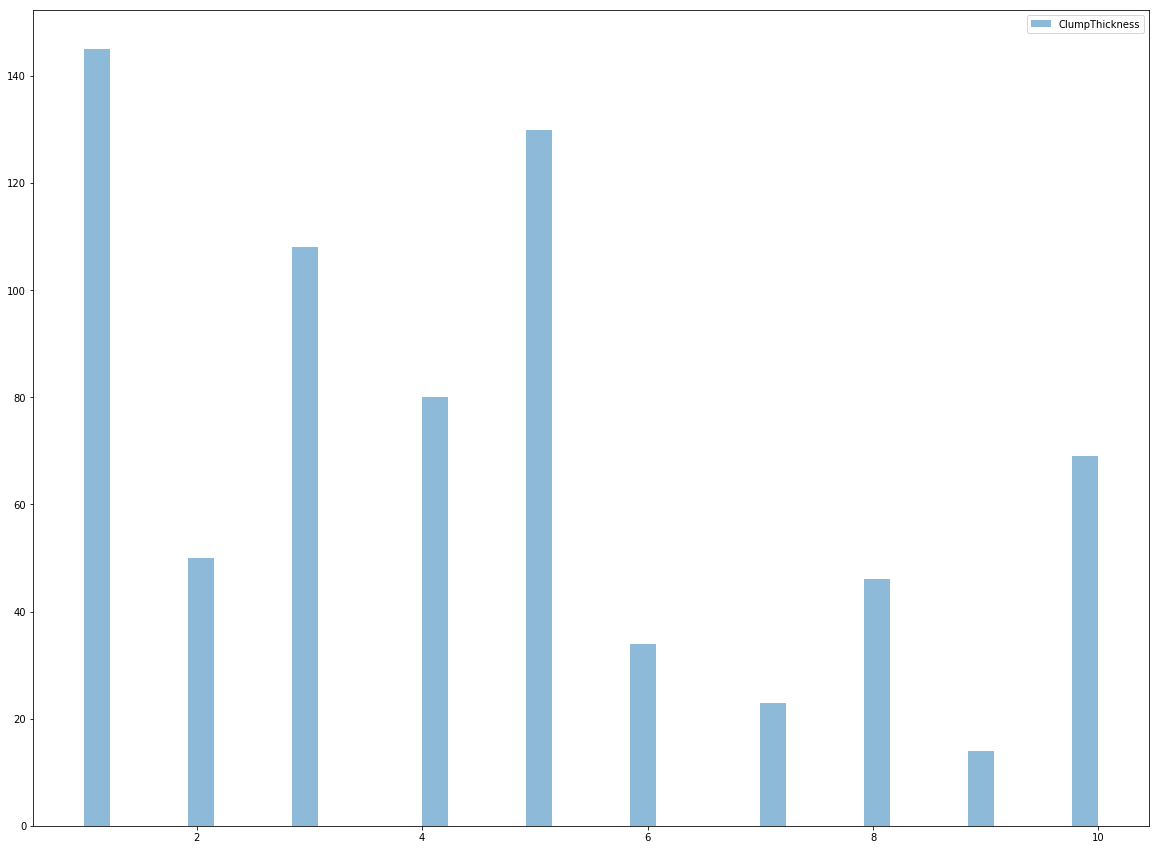

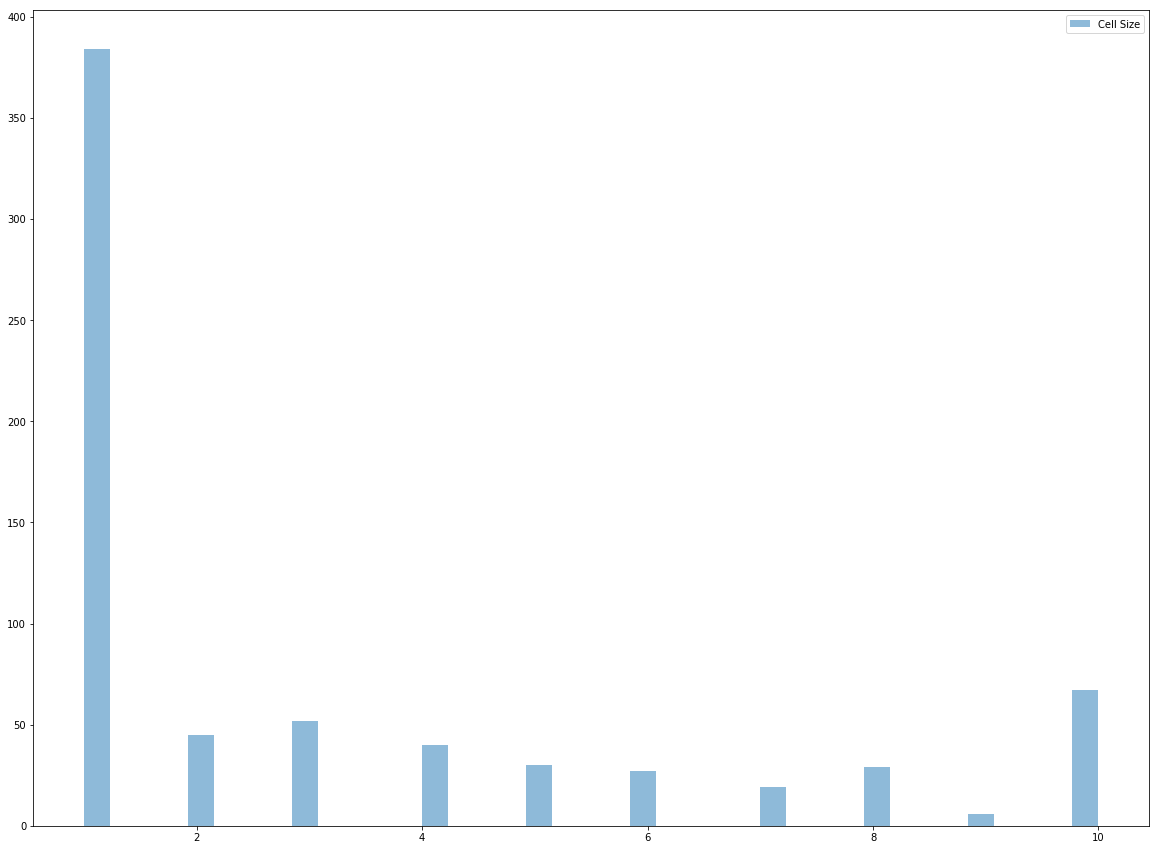

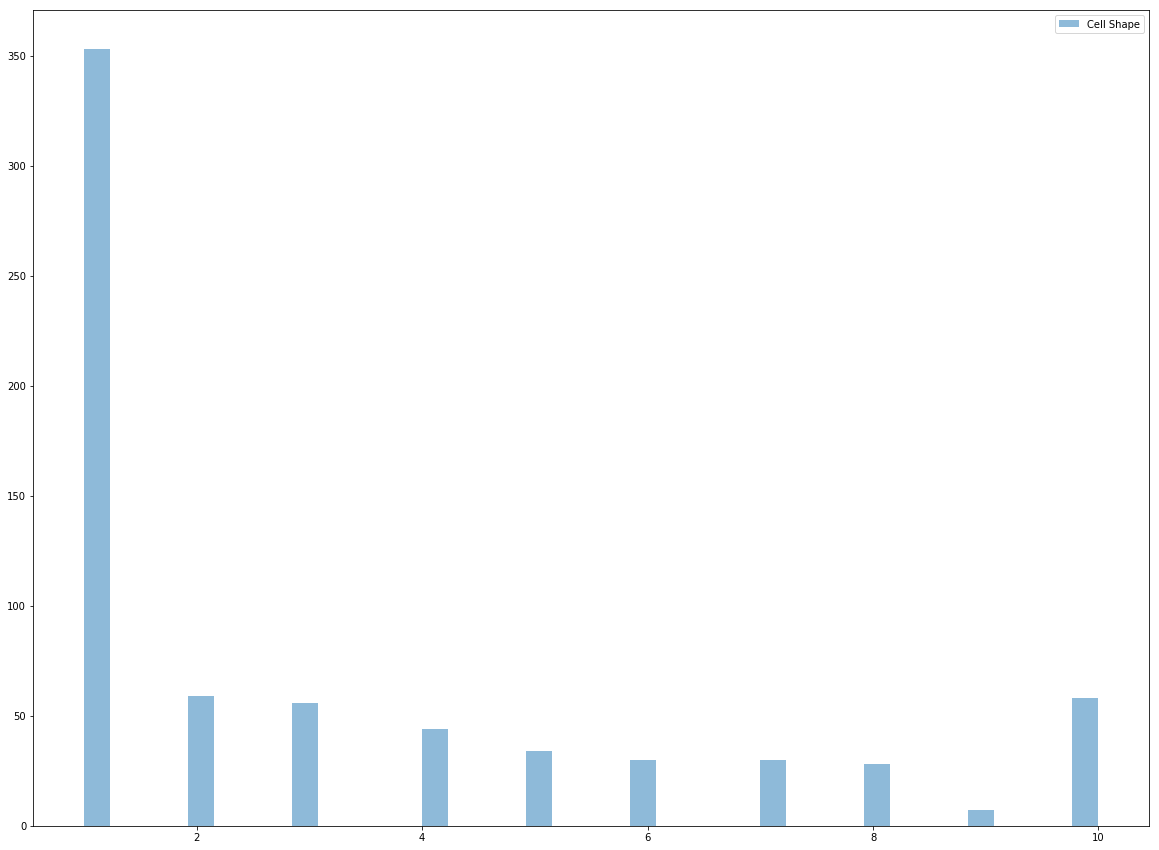

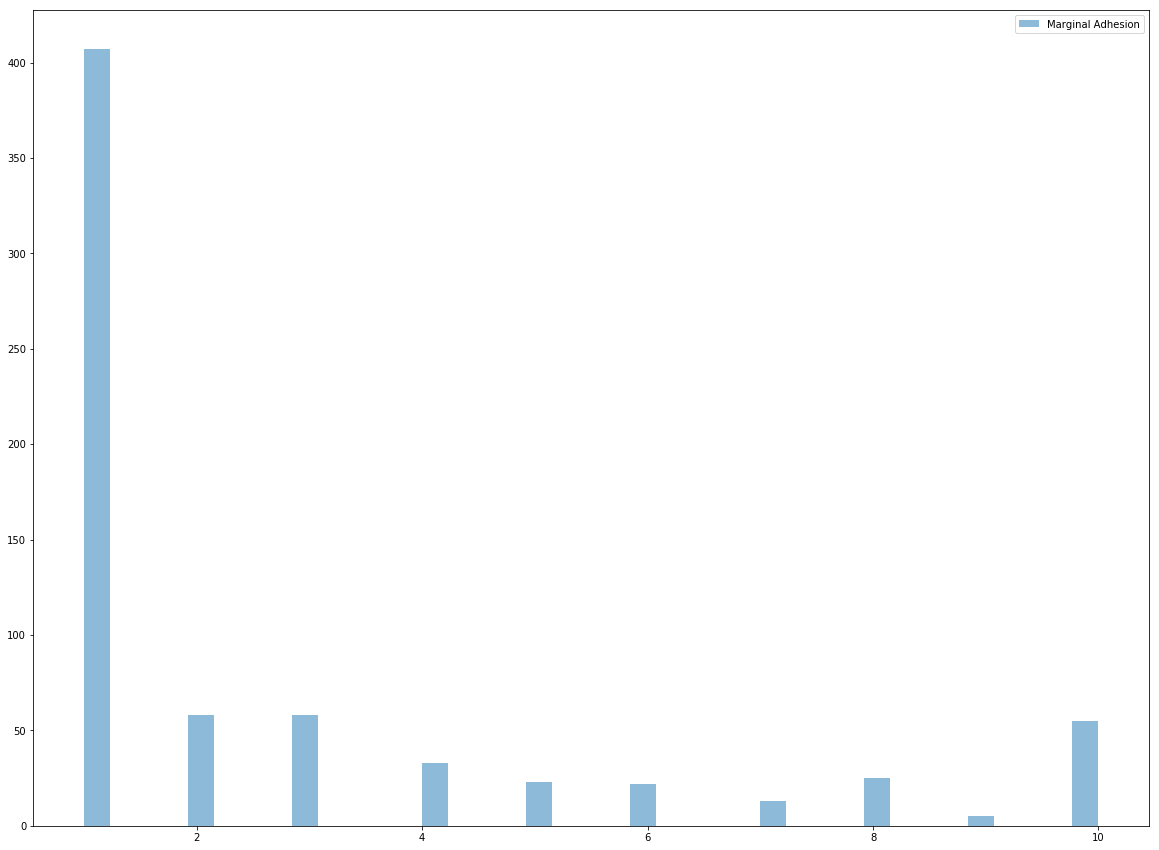

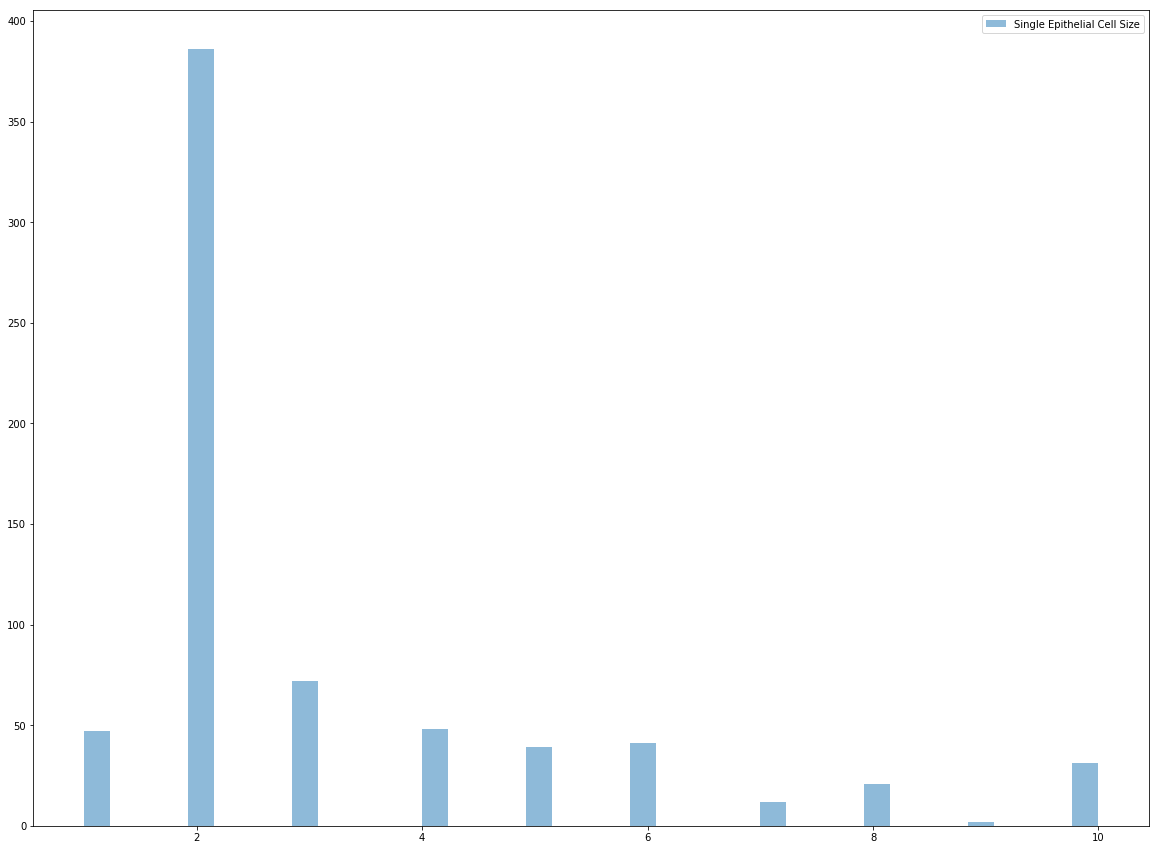

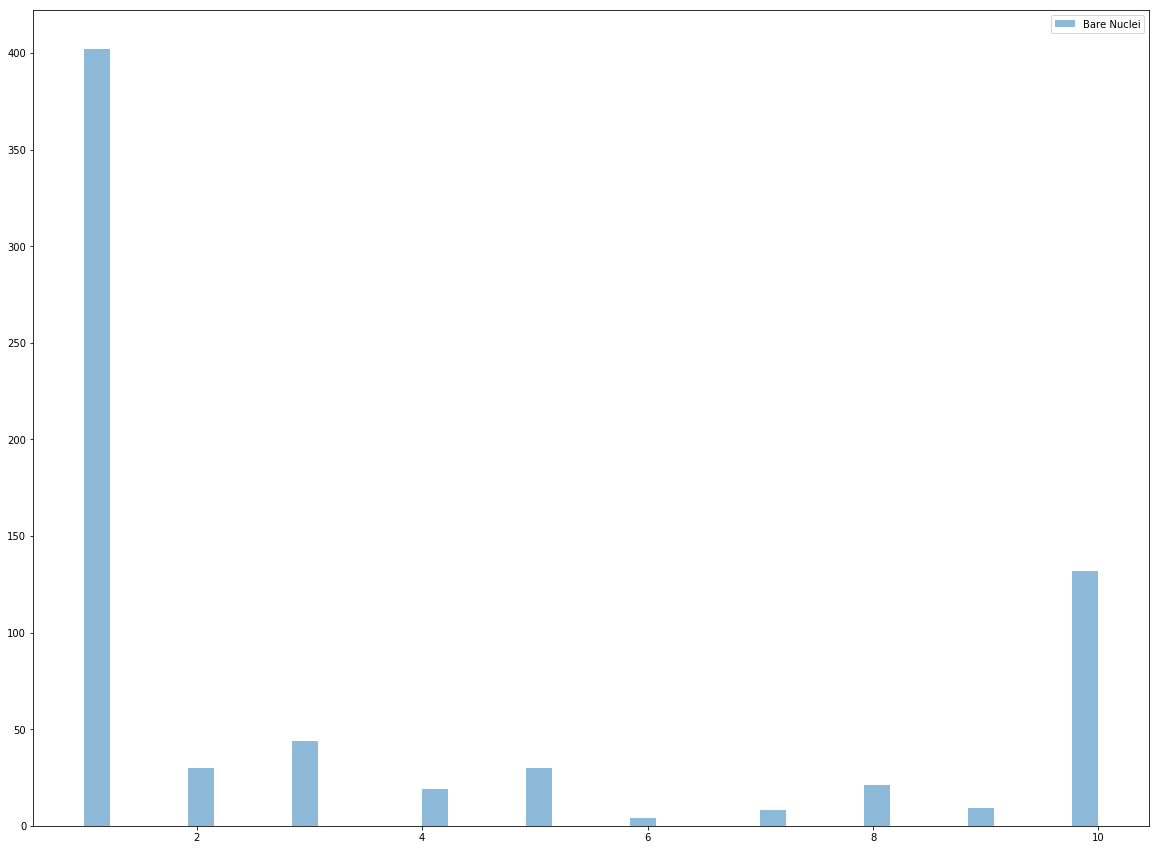

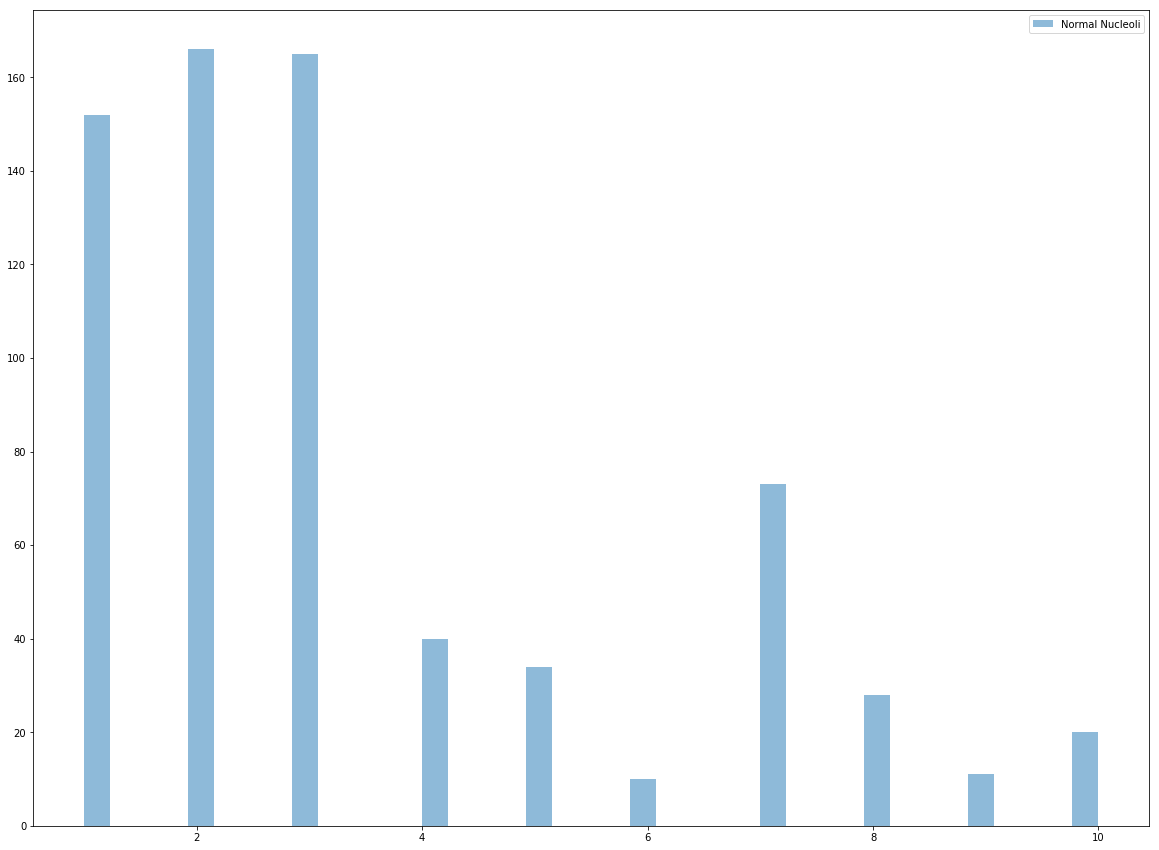

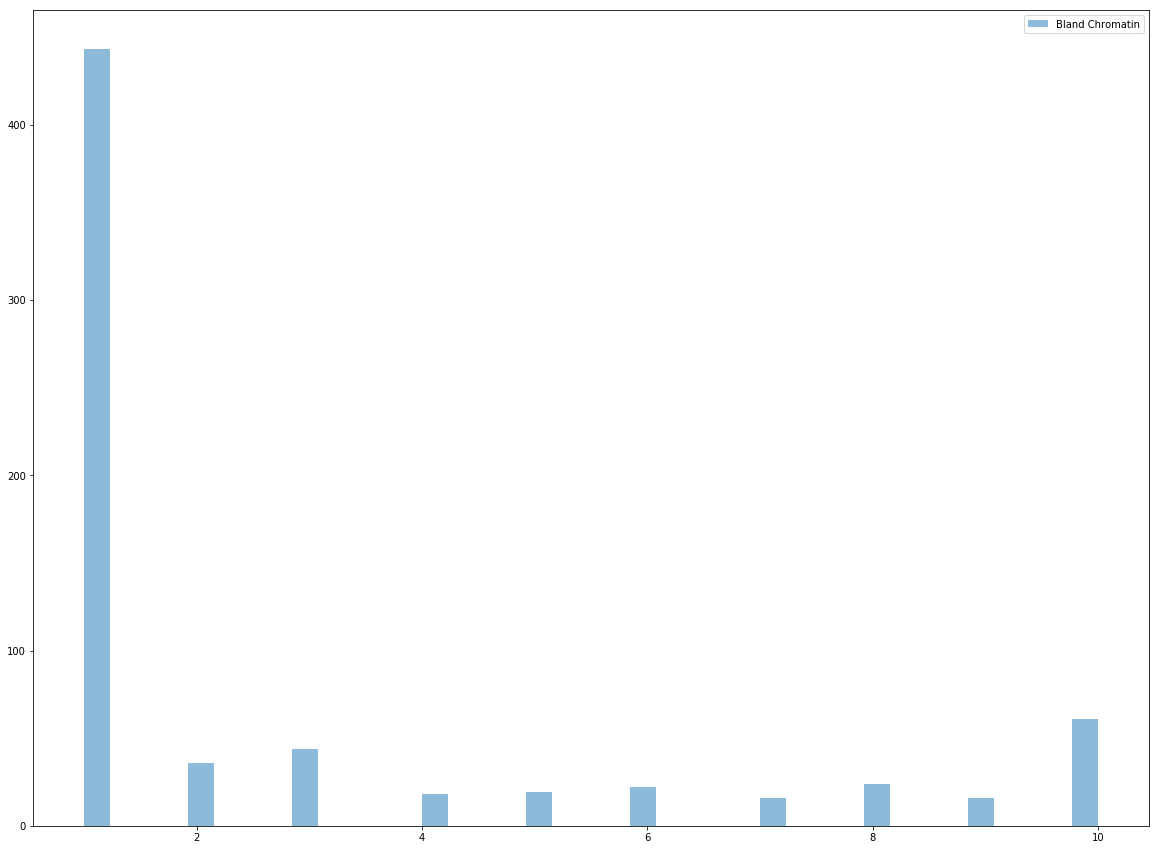

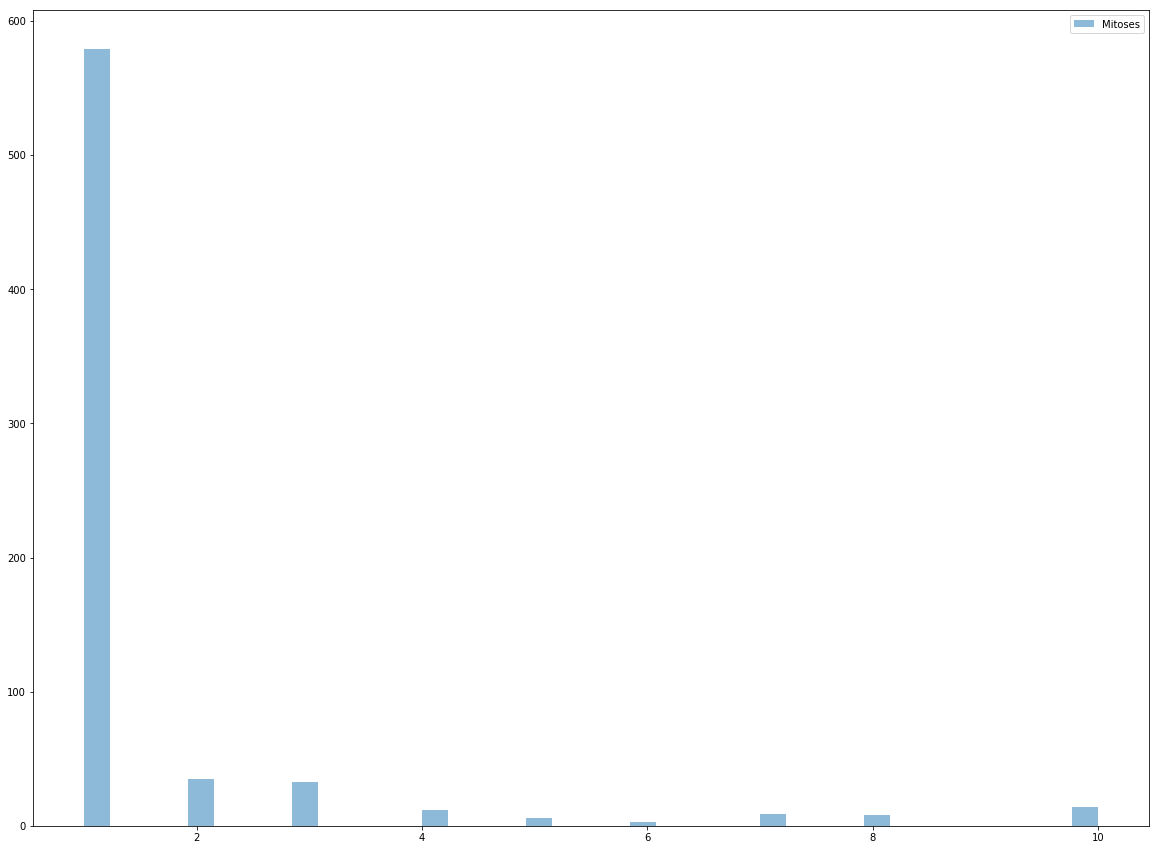

In [44]:
def show_quant_feature_hist_plot(df, cut_pts=40, fig_height=15, fig_len=20):
    #defaul
    descr_trans_df = df.describe()
    for feature in list(descr_trans_df.T.index):
        bins = np.linspace(descr_trans_df[feature]['min'], descr_trans_df[feature]['max'], cut_pts)
        plt.subplots(figsize=(fig_len,fig_height))
        #pyplot.hist(df[feature], bins, alpha=0.5, normed=True, label=str(feature)) 
        plt.hist(df[feature], bins, alpha=0.5, label=str(feature))
        plt.legend(loc='upper right')
        plt.show()
#Now call this function on the original dataframe above
show_quant_feature_hist_plot(dataframe)

In [45]:
#Since after subjecting the data to individual analysis using histogram, it is observed that the data are ordinal in nature. 
#Hence the outliers in the data is actually relevant.

# Q6 Create a covariance matrix for identifying Principal components

In [46]:
# PCA
# Step 1 - Create covariance matrix


In [47]:

cov_matrix = np.cov(scaled_X, rowvar=False)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.58927575
  0.5592282  0.53660222 0.35053534]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.68840199
  0.75680368 0.72390044 0.4593503 ]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.7108287
  0.73700282 0.72047704 0.43953974]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.66704
  0.66767051 0.60421681 0.41823111]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.58316514
  0.61698451 0.62978166 0.47978787]
 [0.58927575 0.68840199 0.7108287  0.66704    0.58316514 1.00143266
  0.6771358  0.57817384 0.34033128]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 0.6771358
  1.00143266 0.66683179 0.34466258]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.57817384
  0.66683179 1.00143266 0.42894941]
 [0.35053534 0.4593503  0.43953974 0.41823111 0.47978787 0.34033128
  0.34466258 0.42894941 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [48]:
# Step 2- Get eigen values and eigen vector

In [49]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.30267815  0.14326117 -0.86272314 -0.0012632  -0.10014079 -0.06484488
   0.23398913  0.27307715 -0.00377956]
 [-0.38119621  0.04851152  0.01607035 -0.73472437  0.20324031  0.1370179
  -0.44811882  0.09330593  0.20654523]
 [-0.37767322  0.08491369 -0.03714495  0.66602567  0.17251104  0.10435368
  -0.58952066  0.01753778  0.12919265]
 [-0.33273684  0.04408953  0.42439217  0.04721747 -0.46762945 -0.01727694
   0.10496666  0.68216    -0.09832619]
 [-0.336271   -0.16549963  0.10695366  0.06735997  0.38924391  0.67291374
   0.45358504 -0.0363027  -0.17937179]
 [-0.33362463  0.25270367  0.00641479 -0.07653501 -0.53453834  0.12353446
  -0.0781495  -0.58781818 -0.40780773]
 [-0.34604243  0.22960457  0.19582479  0.05973904 -0.01081397 -0.25172566
   0.40491536 -0.28621346  0.69011805]
 [-0.33595996 -0.02483019  0.12674002 -0.01854131  0.44960697 -0.6464732
   0.09138302 -0.03275805 -0.49051971]
 [-0.22962249 -0.90740541 -0.08984127  0.00716432 -0.24641918 -0.12831988

# Q8 Find variance and cumulative variance by each eigen vector

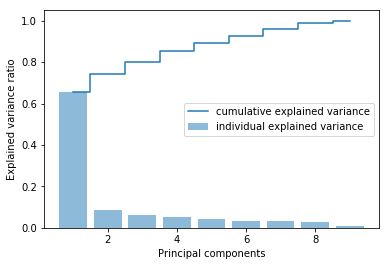

In [50]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
cum_var_exp = np.cumsum(var_explained)

plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


# The plot shows that the first principal component alone accounts for 40 percent of the variance. 
# Also, we can see that the first two principal components combined explain almost 60 percent of the variance 
# in the data.

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [51]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(scaled_X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4','principal component 5', 'principal component 6', 'principal component 7','principal component 8','principal component 9'])
print(principalDf)

     principal component 1  principal component 2  principal component 3  \
0                -1.461774              -0.103874              -0.576030   
1                 1.465206              -0.548800               0.296450   
2                -1.584250              -0.072235               0.038977   
3                 1.501654              -0.553258              -0.630416   
4                -1.336120              -0.083863               0.028054   
5                 5.053462              -1.539610               0.469271   
6                -1.058046              -0.531938               0.666456   
7                -1.657318               0.020279               0.331300   
8                -1.532603               2.355150              -0.026610   
9                -1.586352               0.025363              -0.344515   
10               -2.044034               0.024992               0.602084   
11               -1.926508               0.143102               0.263440   
12          

# Q10 Find correlation between components and features

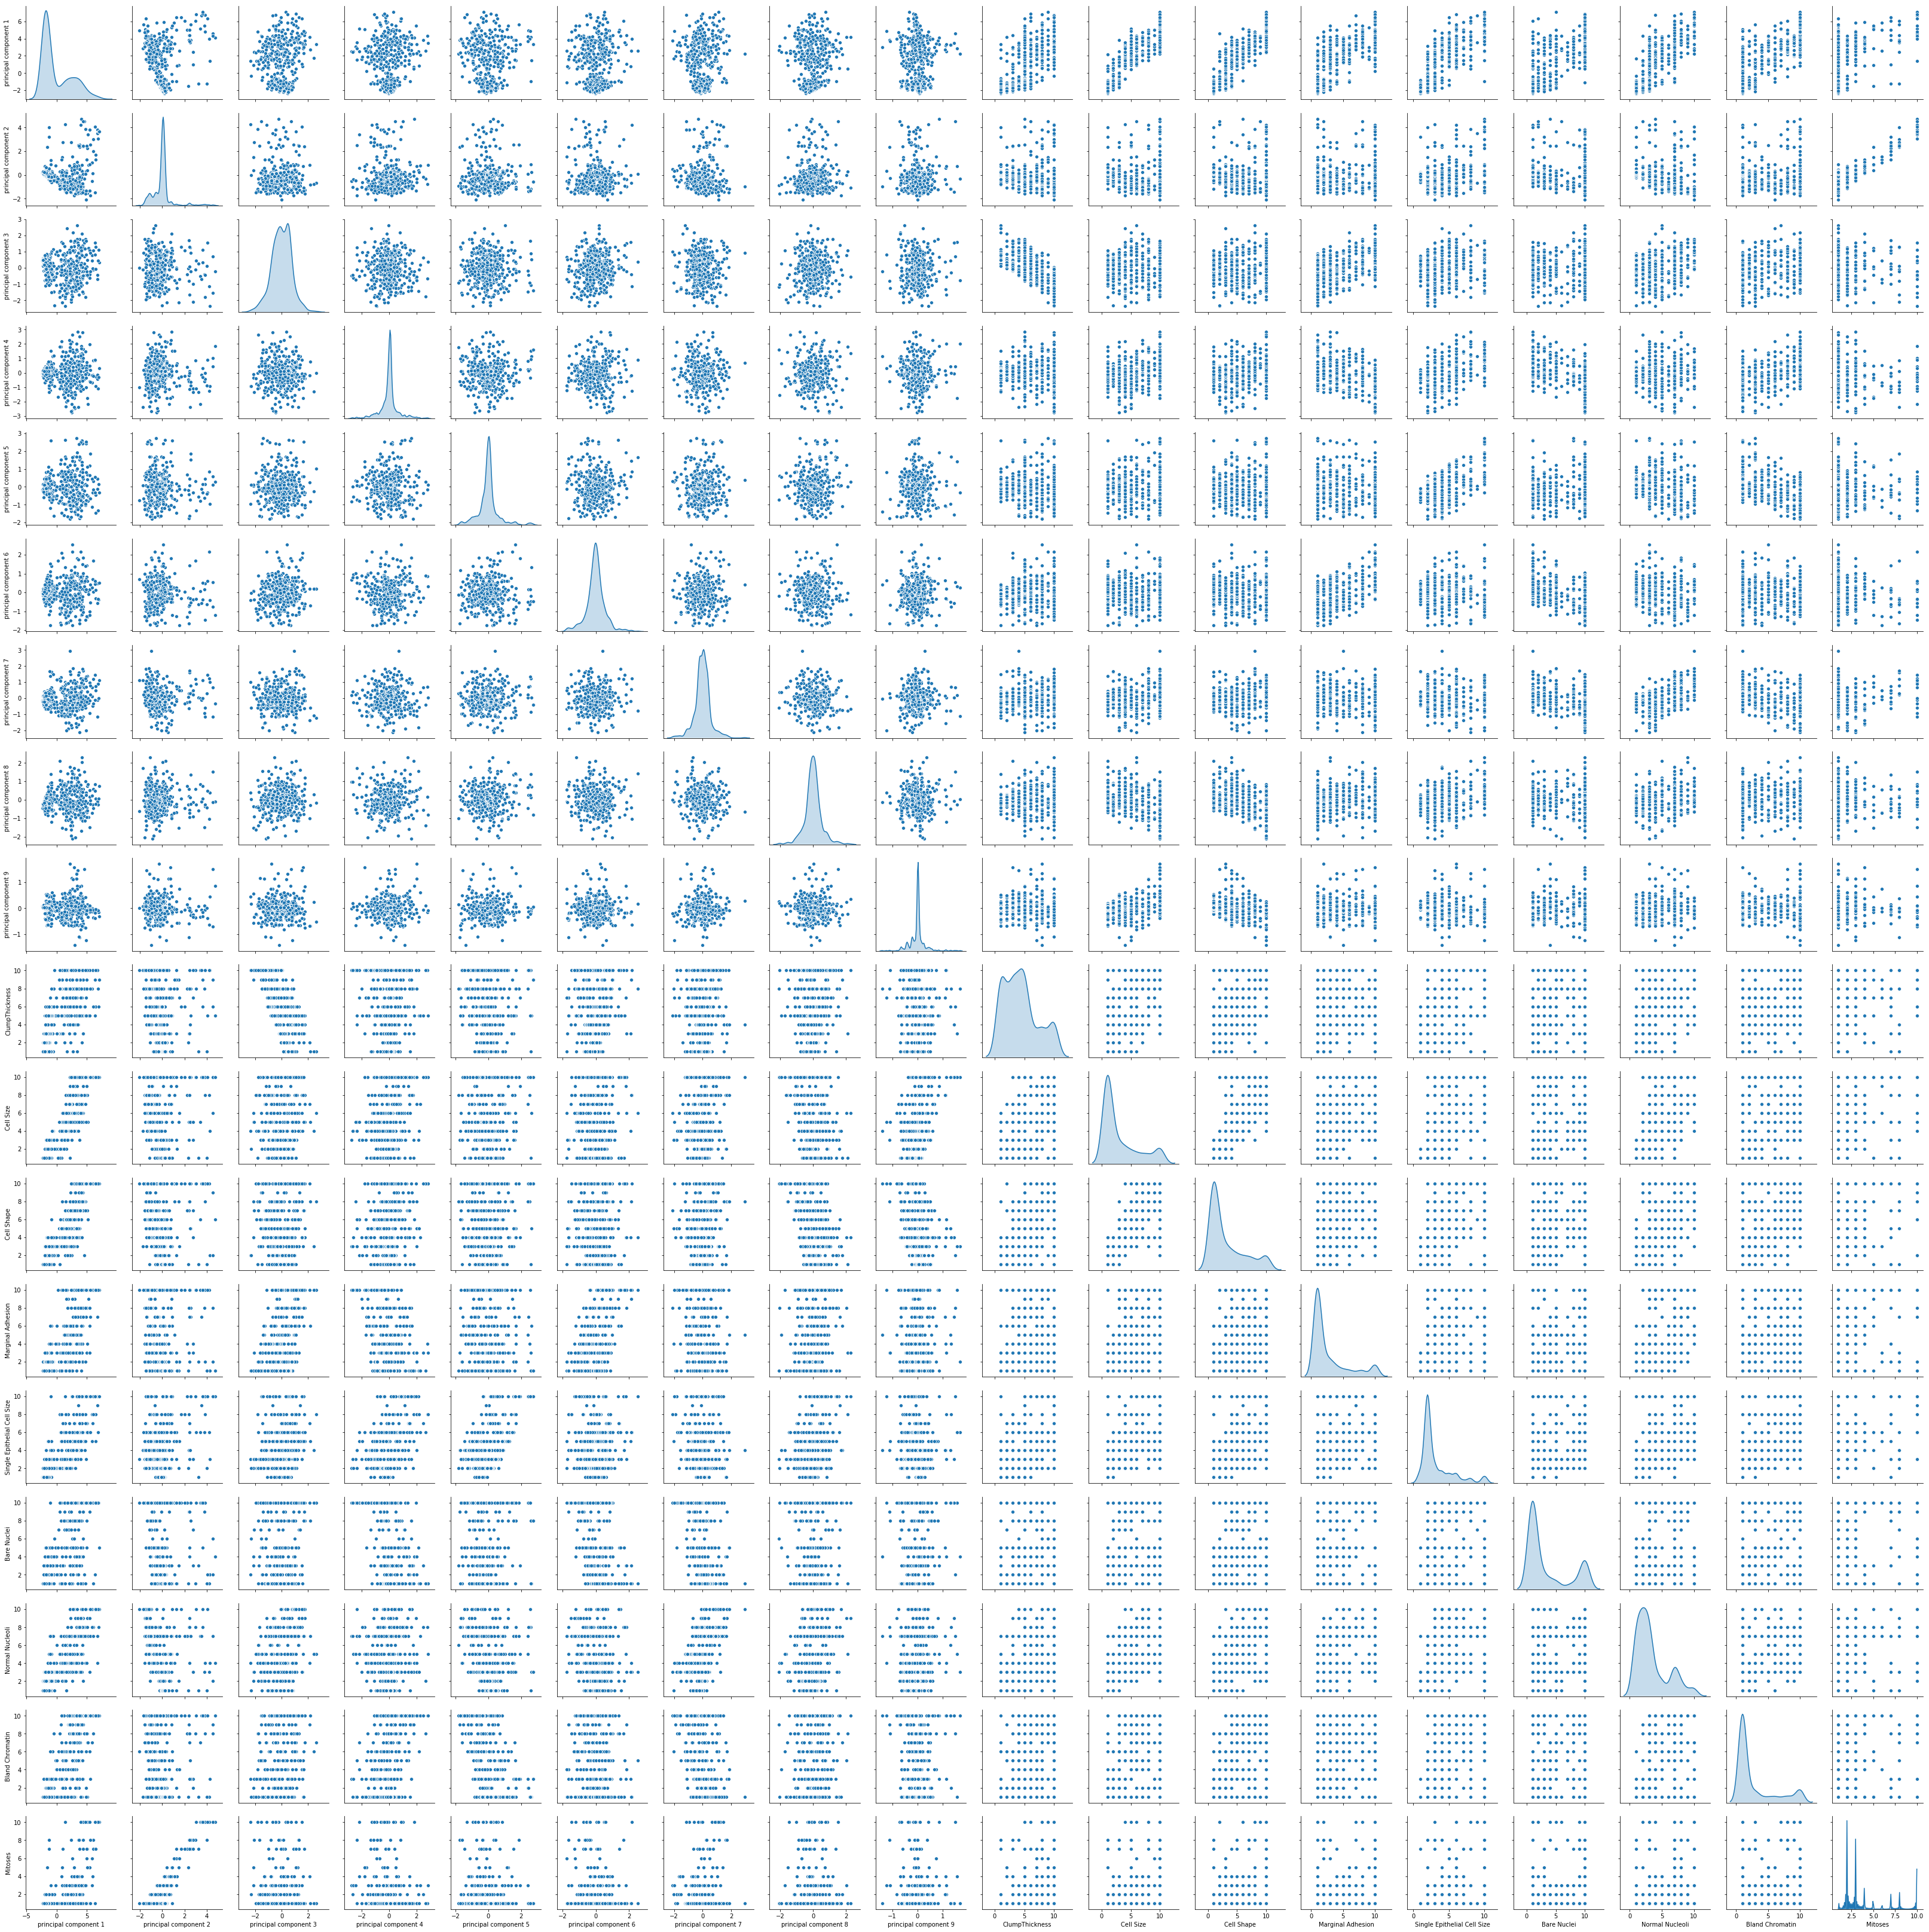

In [52]:
#The below pairplot shows the the correlation between components and features.
combineddf = principalDf.join(dataframe)
sns.pairplot(combineddf, diag_kind='kde') 

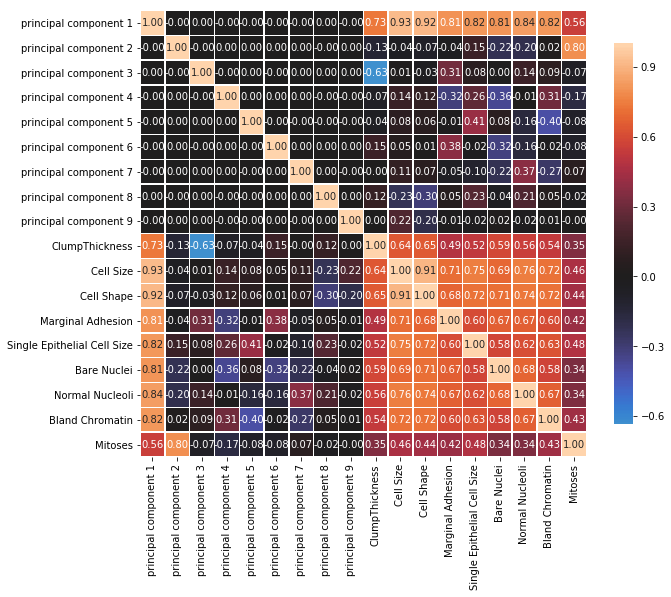

In [53]:
# Check for correlation of variable
plt.figure(figsize=(10,10))
sns.heatmap(combineddf.corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();